In [1]:
# Imports
import os
import datetime
from directory_tree import display_tree
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import ImageGrid
from PIL import Image
import numpy as np
import pandas as pd

In [2]:
dataset_dir = '../dataset/MMAFEDB/'
test_dir = dataset_dir + 'test/'
train_dir = dataset_dir + 'train/'
valid_dir = dataset_dir + 'valid/'

print('Dataset Directory: ',dataset_dir)
print('Test Directory: ',test_dir)
print('Train Directory: ', train_dir)
print('Validate Directory: ',valid_dir)

Dataset Directory:  ../dataset/MMAFEDB/
Test Directory:  ../dataset/MMAFEDB/test/
Train Directory:  ../dataset/MMAFEDB/train/
Validate Directory:  ../dataset/MMAFEDB/valid/


In [3]:
print('Project root folder structure (excluding hidden files):')
display_tree(dir_path='..',max_depth=4)

Project root folder structure (excluding hidden files):
../
├── dataset/
│   ├── Facial Expression Dataset/
│   │   ├── source.txt
│   │   ├── test/
│   │   │   ├── angry/
│   │   │   ├── disgust/
│   │   │   ├── fear/
│   │   │   ├── happy/
│   │   │   ├── neutral/
│   │   │   ├── sad/
│   │   │   └── surprise/
│   │   └── train/
│   │       ├── angry/
│   │       ├── disgust/
│   │       ├── fear/
│   │       ├── happy/
│   │       ├── neutral/
│   │       ├── sad/
│   │       └── surprise/
│   ├── MMAFEDB/
│   │   ├── test/
│   │   │   ├── angry/
│   │   │   ├── disgust/
│   │   │   ├── fear/
│   │   │   ├── happy/
│   │   │   ├── neutral/
│   │   │   ├── sad/
│   │   │   └── surprise/
│   │   ├── train/
│   │   │   ├── angry/
│   │   │   ├── disgust/
│   │   │   ├── fear/
│   │   │   ├── happy/
│   │   │   ├── neutral/
│   │   │   ├── sad/
│   │   │   └── surprise/
│   │   └── valid/
│   │       ├── angry/
│   │       ├── disgust/
│   │       ├── fear/
│   │       ├── happy/
│   │ 

In [4]:
import os
FILE_SIZE_LOWER_LIMIT = 750

import os
import cv2

folder_path = '../dataset/MMAFEDB/train/happy'

def is_grayscale(image_path):
    # Read the image with the IMREAD_UNCHANGED flag
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

    # Check if the image has 3 channels (RGB)
    return image.shape[-1] == 3

def check_images(folder_path):
    # Get the list of files in the folder
    files = os.listdir(folder_path)

    # Initialize counters
    rgb_count = 0
    grayscale_count = 0

    # Iterate through each file
    # print(f'\nChecking files in {folder_path} wait ...')
    for file in files:
        # Create the full path to the image
        image_path = os.path.join(folder_path, file)

        # Check if the image is grayscale or RGB
        if is_grayscale(image_path):
            # print(f"{file} is grayscale.")
            grayscale_count += 1
        else:
            # print(f"{file} is RGB.")
            rgb_count += 1

    return [rgb_count, grayscale_count]

def summarize_images(folder):
    total_size = 0
    total_images = 0
    small_files = []
    emotion_counts = {}
    total_img_rgb_folder = 0
    total_img_grayscale_folder = 0

    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.endswith(".jpg"):
                file_path = os.path.join(root, file)
                file_size = os.path.getsize(file_path)

                # Extract emotion from the path
                emotion = os.path.basename(os.path.dirname(file_path))

                total_size += file_size
                total_images += 1

                if file_size < FILE_SIZE_LOWER_LIMIT:
                    small_files.append(file_path)

                # Count per emotion
                if emotion in emotion_counts:
                    emotion_counts[emotion] += 1
                else:
                    emotion_counts[emotion] = 1

    average_size = total_size / total_images if total_images > 0 else 0

    for emotion in emotion_counts.items():
        value_check_images = check_images(f"{folder}{emotion[0]}")
        total_img_rgb_folder += value_check_images[0]
        total_img_grayscale_folder += value_check_images[1]

    print('###########################')
    print(f"Folder: {folder}")
    print(f"Total Images: {total_images}")
    print(f"Total Grayscale Images: {total_img_grayscale_folder}")
    print(f"Total RGB Images: {total_img_rgb_folder}")
    print(f"Total Size: {total_size} bytes")
    print(f"Average Size: {average_size} bytes per file")
    print(f"Number of Files less than {FILE_SIZE_LOWER_LIMIT} bytes: {len(small_files)}")

    print("\nCount per emotion:")
    for emotion, count in emotion_counts.items():
        print(f"{emotion}: {count}")
    print('###########################')

    return {
                "total_size":total_size, 
                "total_images":total_images, 
                "small_files":small_files, 
                "emotion_counts":emotion_counts
            }

# Summarize images in the test folder
print("\nTest Folder:")
summary_test_dir = summarize_images(test_dir)

# Summarize images in the train folder
print("\nTrain Folder:")
summary_train_dir = summarize_images(train_dir)

# Summarize images in the valid folder
print("\nValid Folder:")
summary_valid_dir = summarize_images(valid_dir)



Test Folder:
###########################
Folder: ../dataset/MMAFEDB/test/
Total Images: 17356
Total Grayscale Images: 13767
Total RGB Images: 3589
Total Size: 21007157 bytes
Average Size: 1210.3685757086887 bytes per file
Number of Files less than 750 bytes: 185

Count per emotion:
neutral: 5858
angry: 1041
fear: 691
happy: 5459
disgust: 655
sad: 2177
surprise: 1475
###########################

Train Folder:
###########################
Folder: ../dataset/MMAFEDB/train/
Total Images: 92968
Total Grayscale Images: 64259
Total RGB Images: 28709
Total Size: 108682501 bytes
Average Size: 1169.03129033646 bytes per file
Number of Files less than 750 bytes: 1347

Count per emotion:
neutral: 29384
angry: 6566
fear: 4859
happy: 28592
disgust: 3231
sad: 12223
surprise: 8113
###########################

Valid Folder:
###########################
Folder: ../dataset/MMAFEDB/valid/
Total Images: 17356
Total Grayscale Images: 13767
Total RGB Images: 3589
Total Size: 21068070 bytes
Average Size: 1213.

Images less than 750 bytes in train:
Number of images: 1347
Grid size: (36, 37)


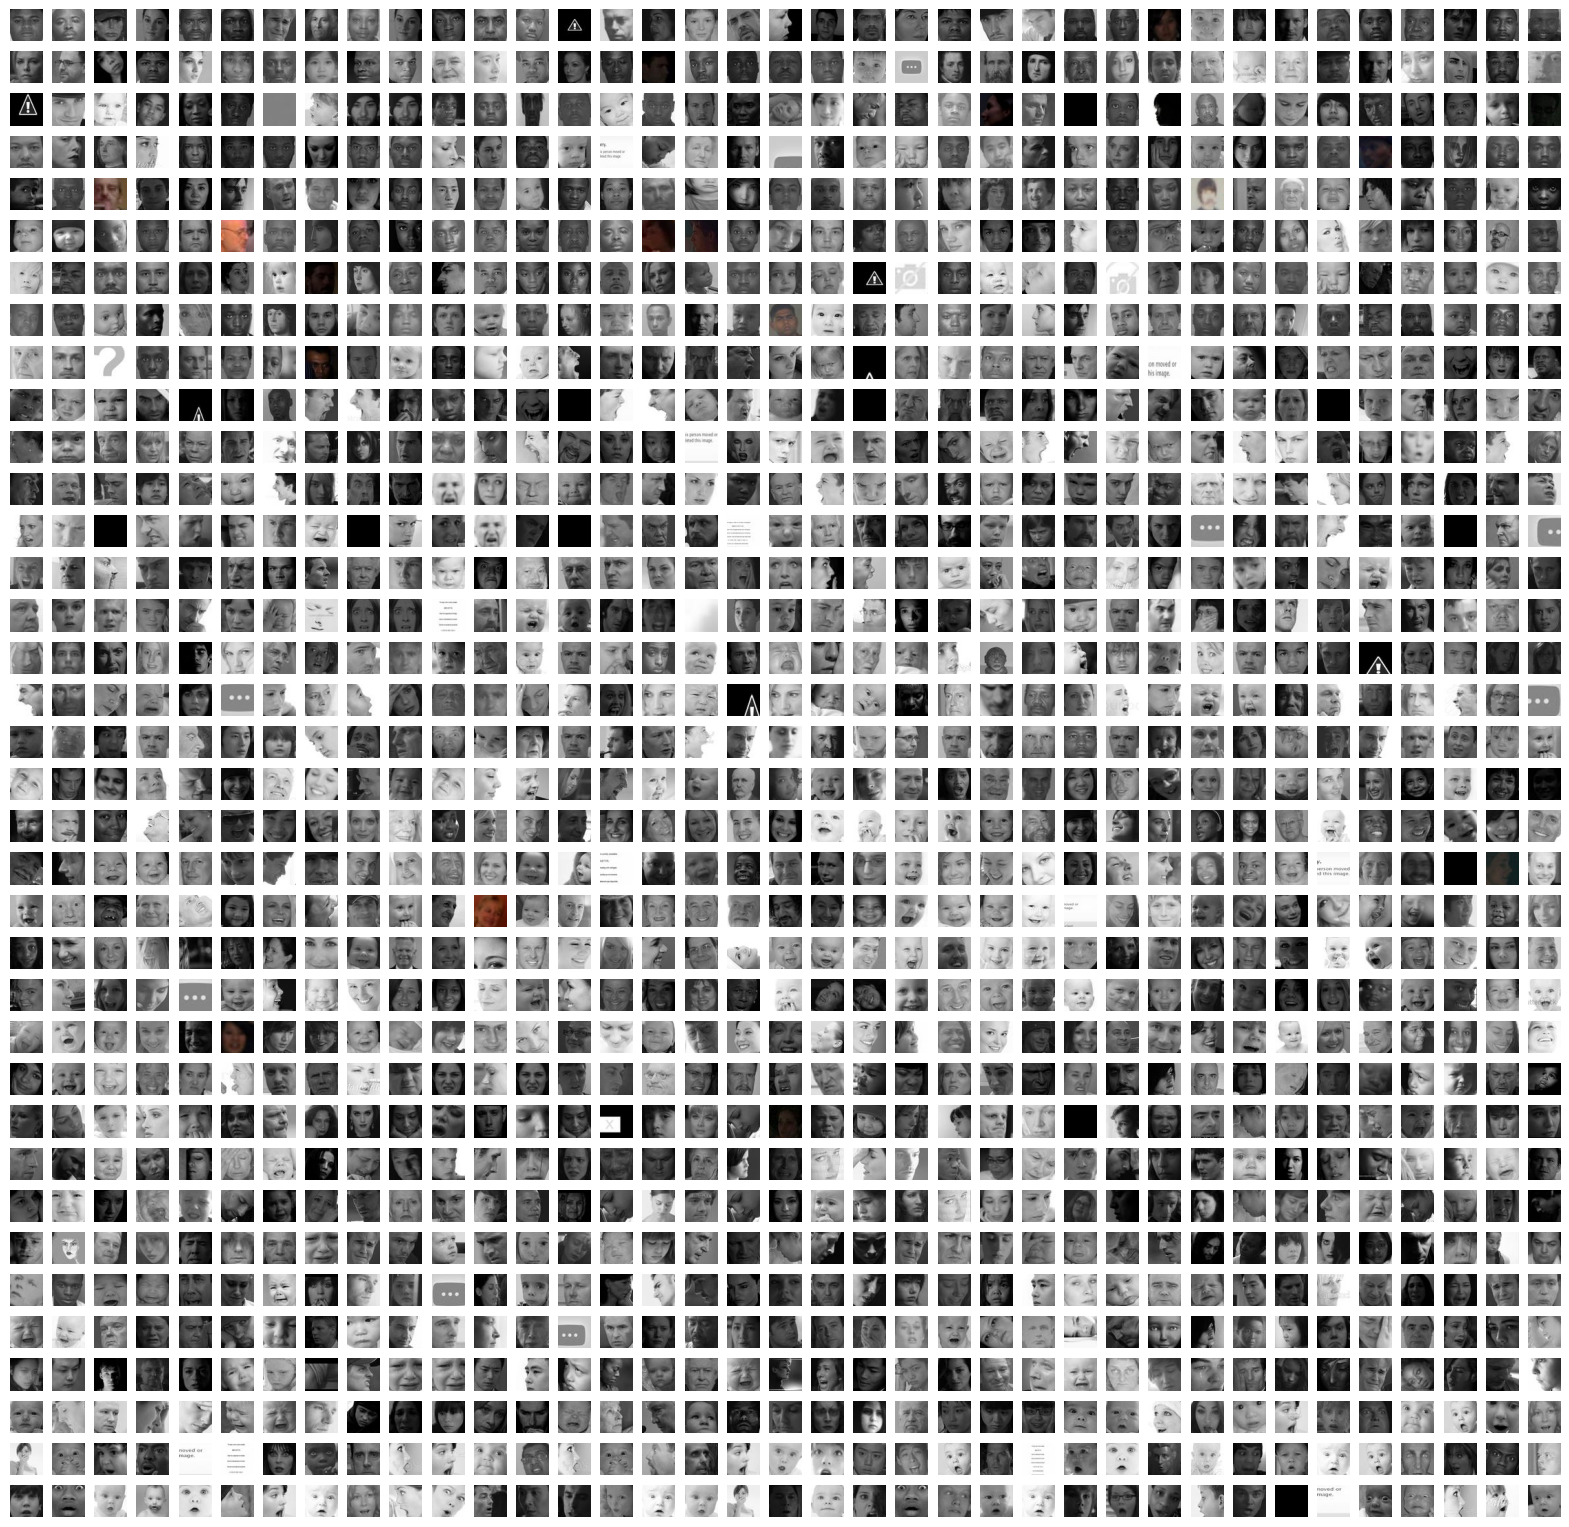


Images less than 750 bytes in test:
Number of images: 185
Grid size: (13, 14)


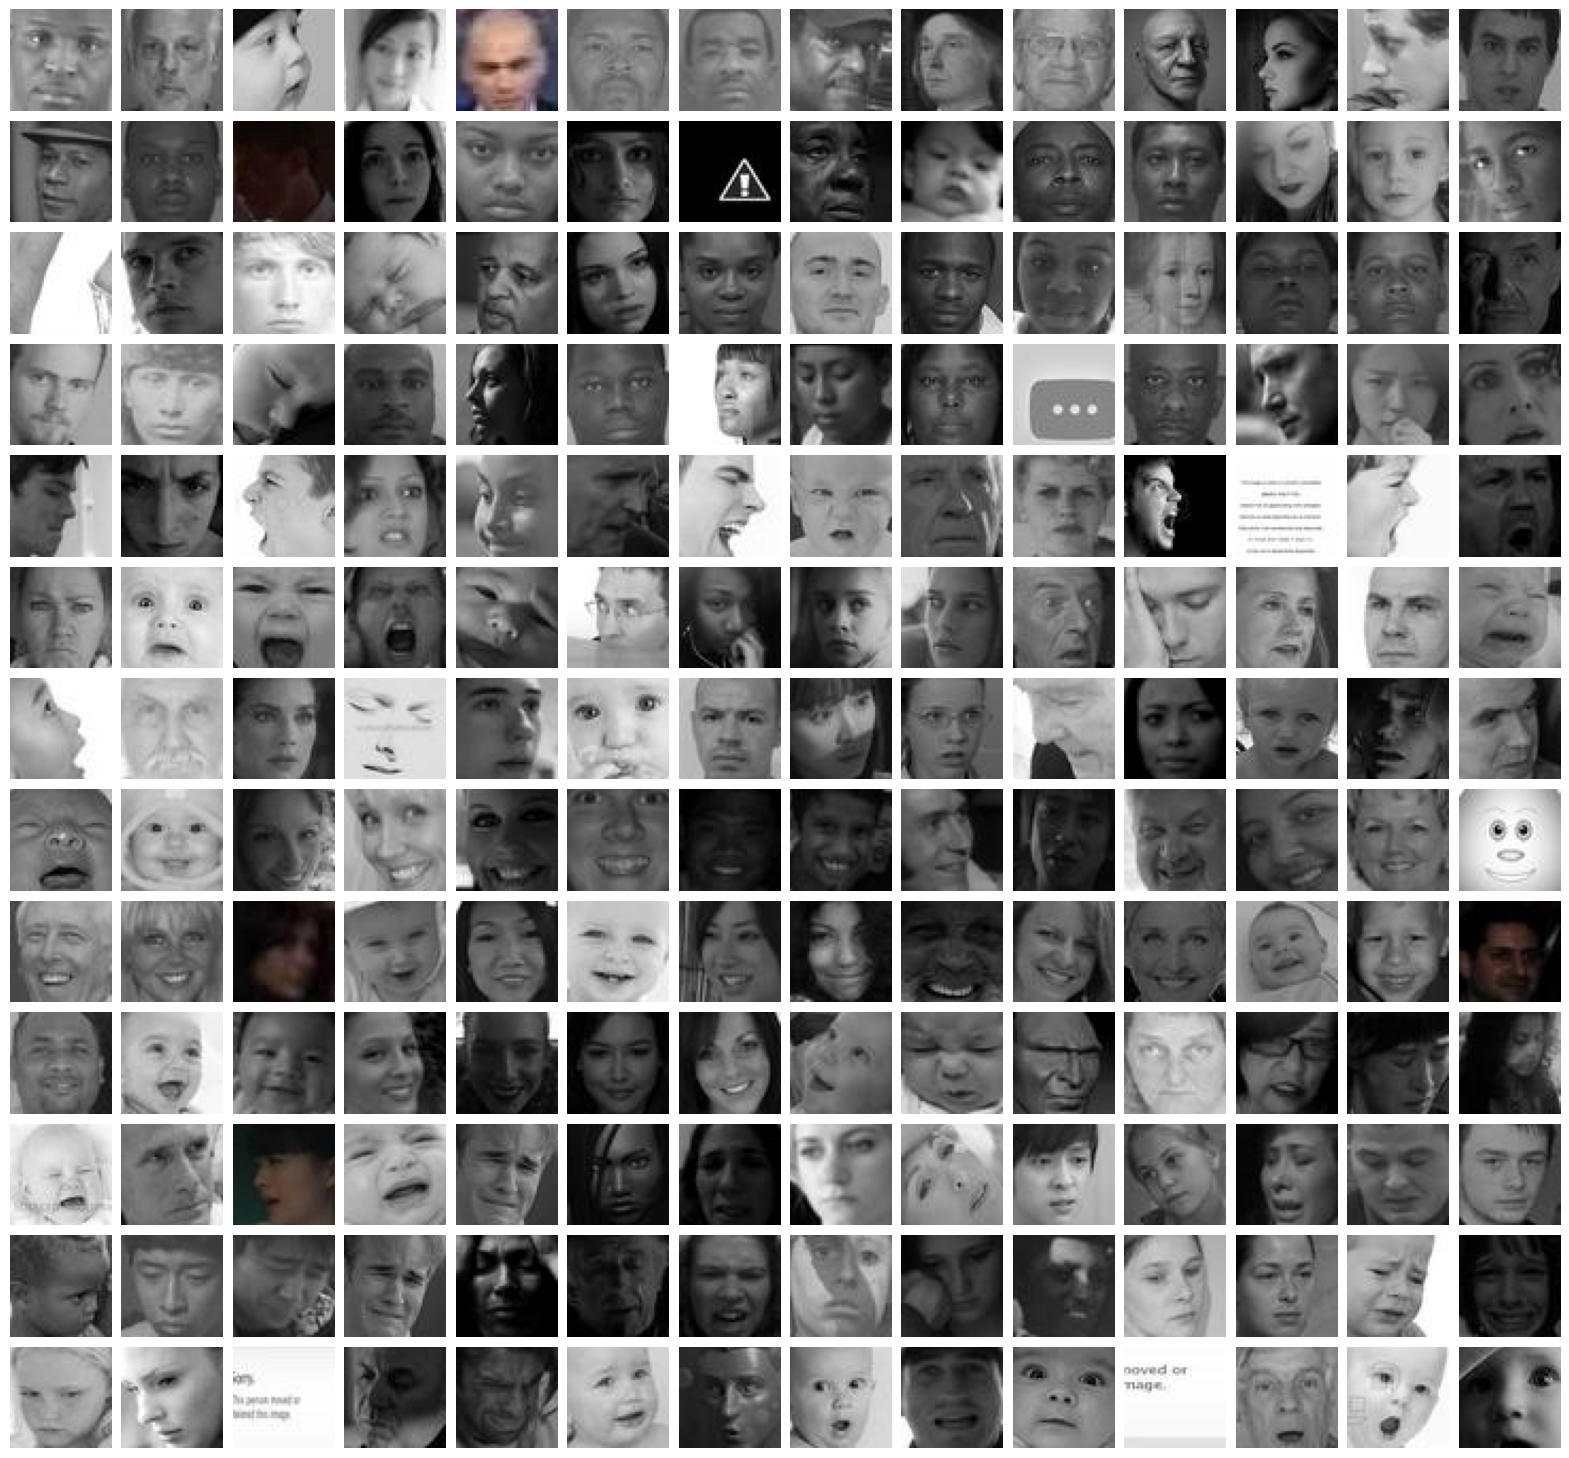


Images less than 750 bytes in valid:
Number of images: 154
Grid size: (12, 13)


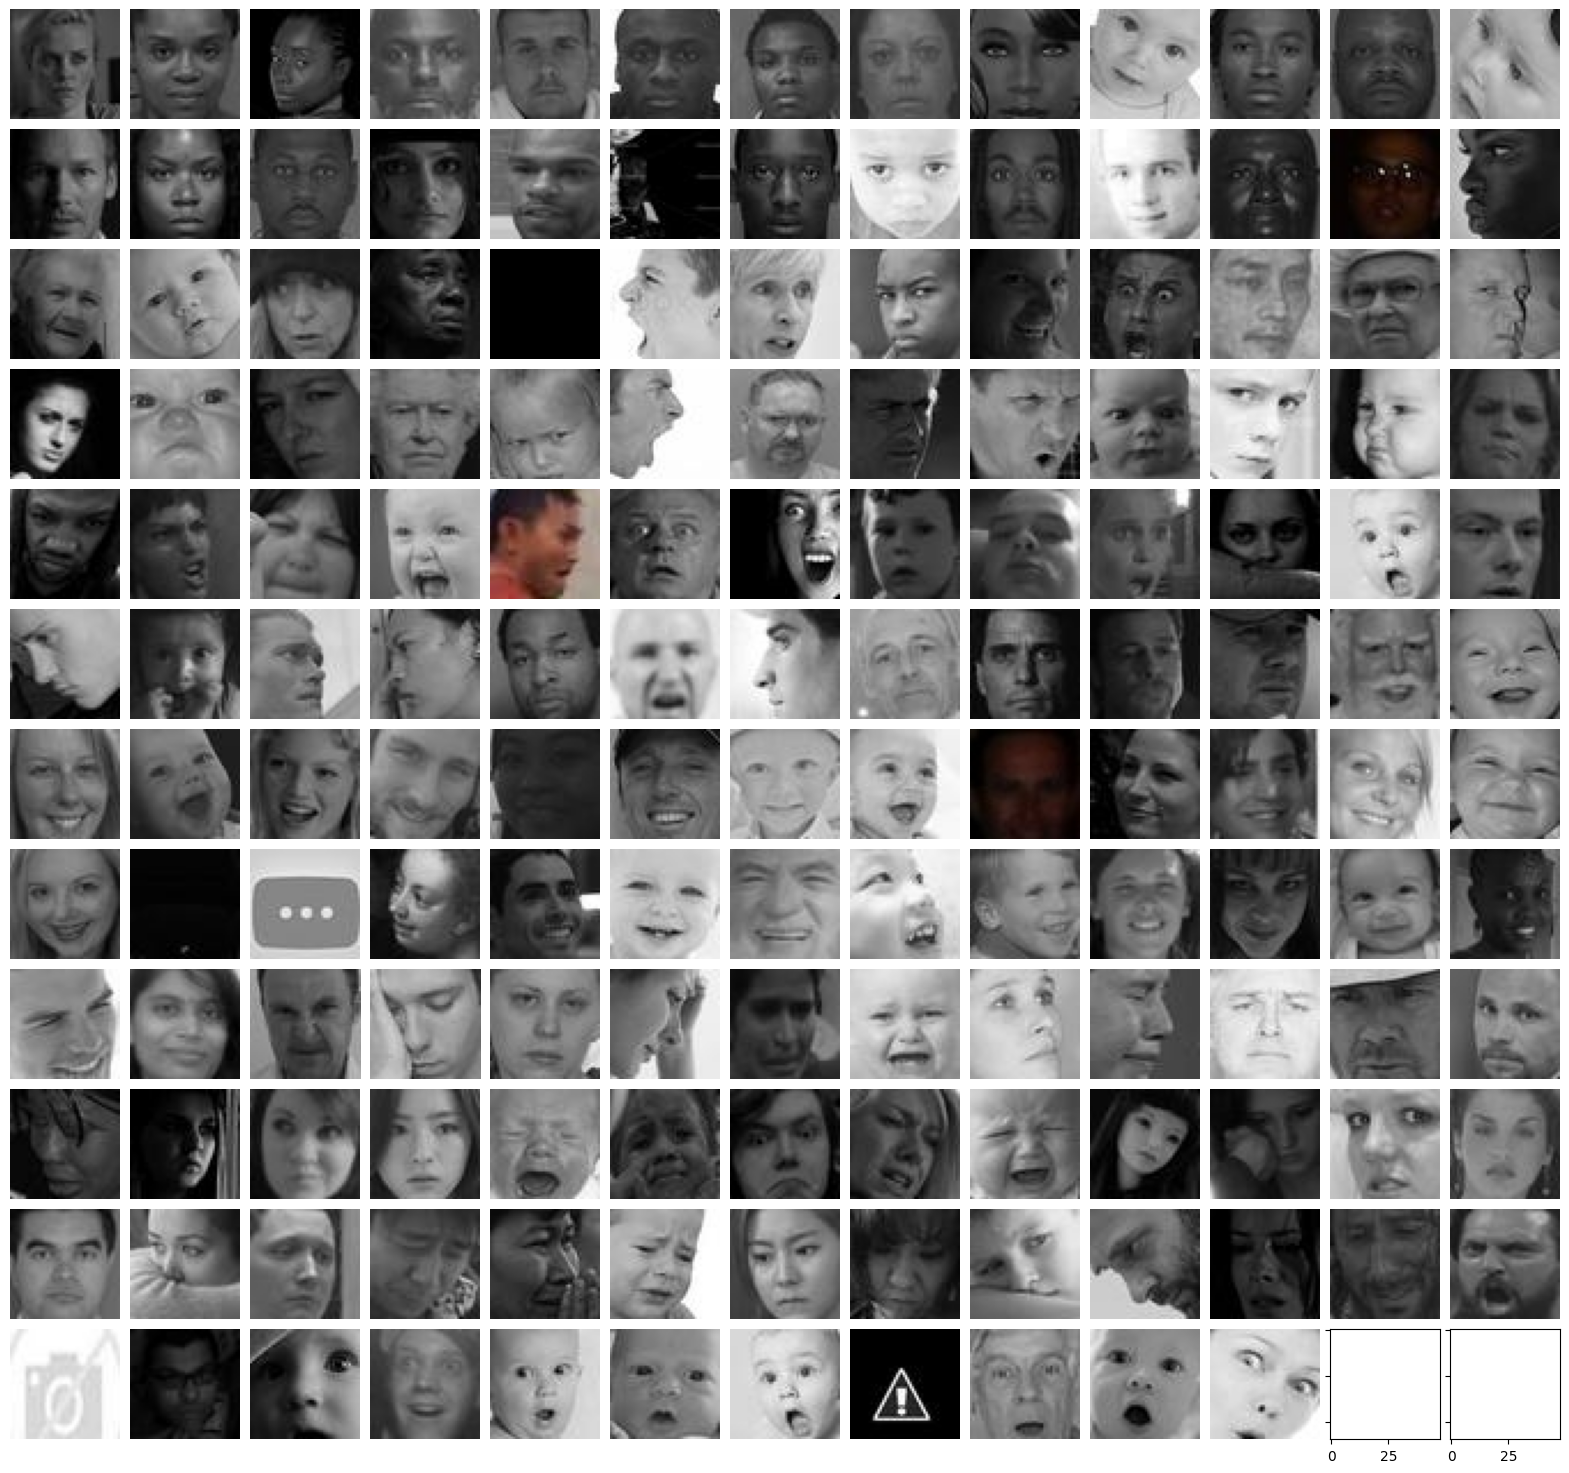

In [6]:
import os
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from PIL import Image

# Function to display images in a grid
def display_images(image_paths):
    num_images = len(image_paths)
    
    if num_images == 0:
        print("No images to display.")
        return

    grid_size = (int(num_images ** 0.5), int(num_images ** 0.5) + 1)

    print(f"Number of images: {num_images}")
    print(f"Grid size: {grid_size}")

    fig = plt.figure(figsize=(20, 20))
    grid = ImageGrid(fig, 111, nrows_ncols=grid_size, axes_pad=0.1)

    for i, image_path in enumerate(image_paths):
        if i >= len(grid):
            print(f"Warning: More images than expected. Skipping extra images starting from {i}.")
            break

        img = Image.open(image_path)

        # Convert BGR to RGB
        if img.mode == 'RGB':
            rgb_img = img
        elif img.mode == 'L':
            rgb_img = img.convert('RGB')
        else:
            rgb_img = Image.merge('RGB', img.split())

        grid[i].imshow(rgb_img)
        grid[i].axis("off")

    plt.show()

# Display small files in a grid
print(f'Images less than {FILE_SIZE_LOWER_LIMIT} bytes in train:')
display_images(summary_train_dir['small_files'])
print('')
print(f'Images less than {FILE_SIZE_LOWER_LIMIT} bytes in test:')
display_images(summary_test_dir['small_files'])
print('')
print(f'Images less than {FILE_SIZE_LOWER_LIMIT} bytes in valid:')
display_images(summary_valid_dir['small_files'])
print('')



Test Folder:
###########################
Folder: ../dataset/MMAFEDB/test/
Total Images: 17356
Total Size: 21007157 bytes
Average Size: 1210.3685757086887 bytes per file
Number of Files less than 675 bytes: 30

Count per emotion:
neutral: 5858
angry: 1041
fear: 691
happy: 5459
disgust: 655
sad: 2177
surprise: 1475
###########################

Train Folder:
###########################
Folder: ../dataset/MMAFEDB/train/
Total Images: 92968
Total Size: 108682501 bytes
Average Size: 1169.03129033646 bytes per file
Number of Files less than 675 bytes: 190

Count per emotion:
neutral: 29384
angry: 6566
fear: 4859
happy: 28592
disgust: 3231
sad: 12223
surprise: 8113
###########################

Valid Folder:
###########################
Folder: ../dataset/MMAFEDB/valid/
Total Images: 17356
Total Size: 21068070 bytes
Average Size: 1213.878197741415 bytes per file
Number of Files less than 675 bytes: 25

Count per emotion:
neutral: 5839
angry: 1017
fear: 659
happy: 5475
disgust: 656
sad: 2236
sur

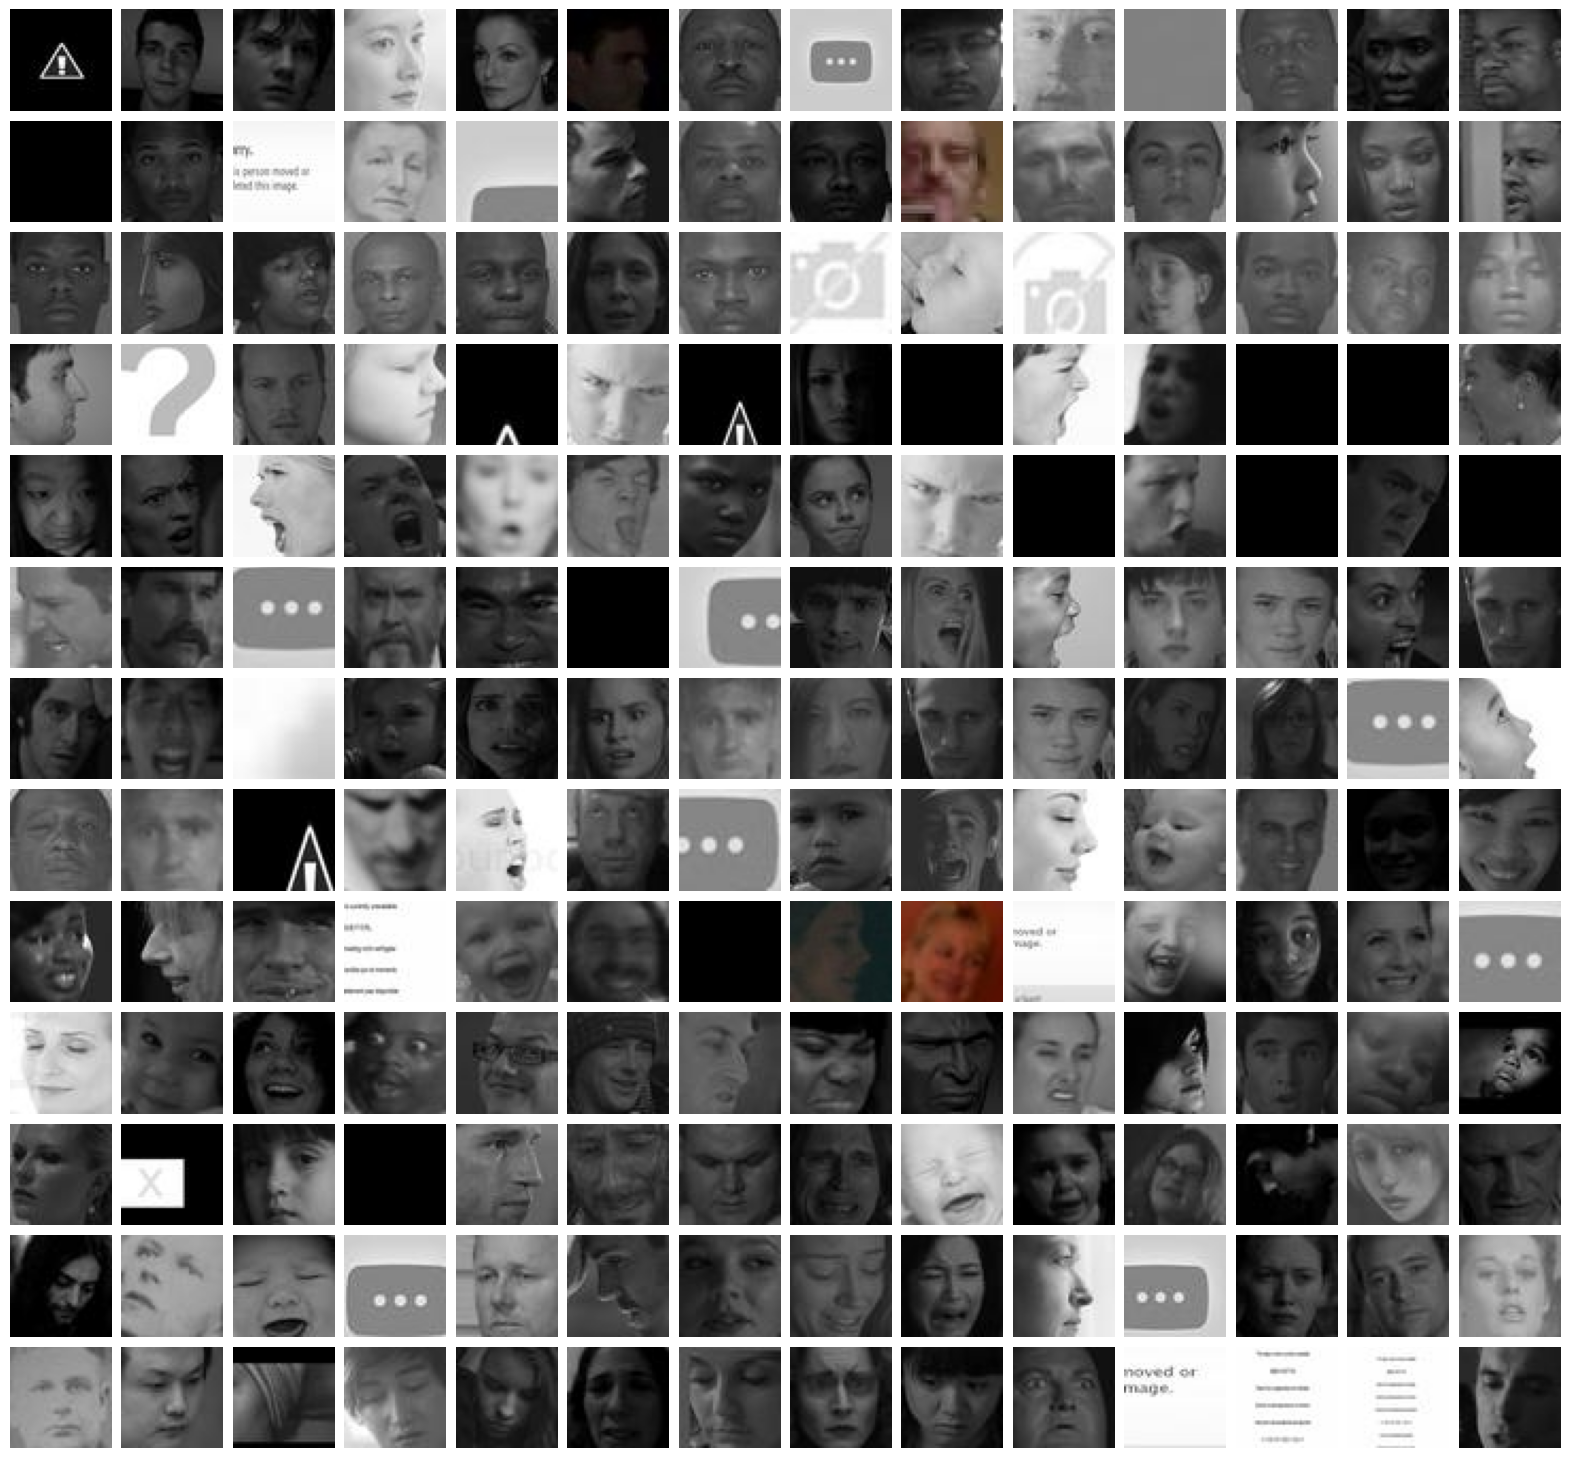


Images less than 675 bytes in test:
Number of images: 30
Grid size: (5, 6)


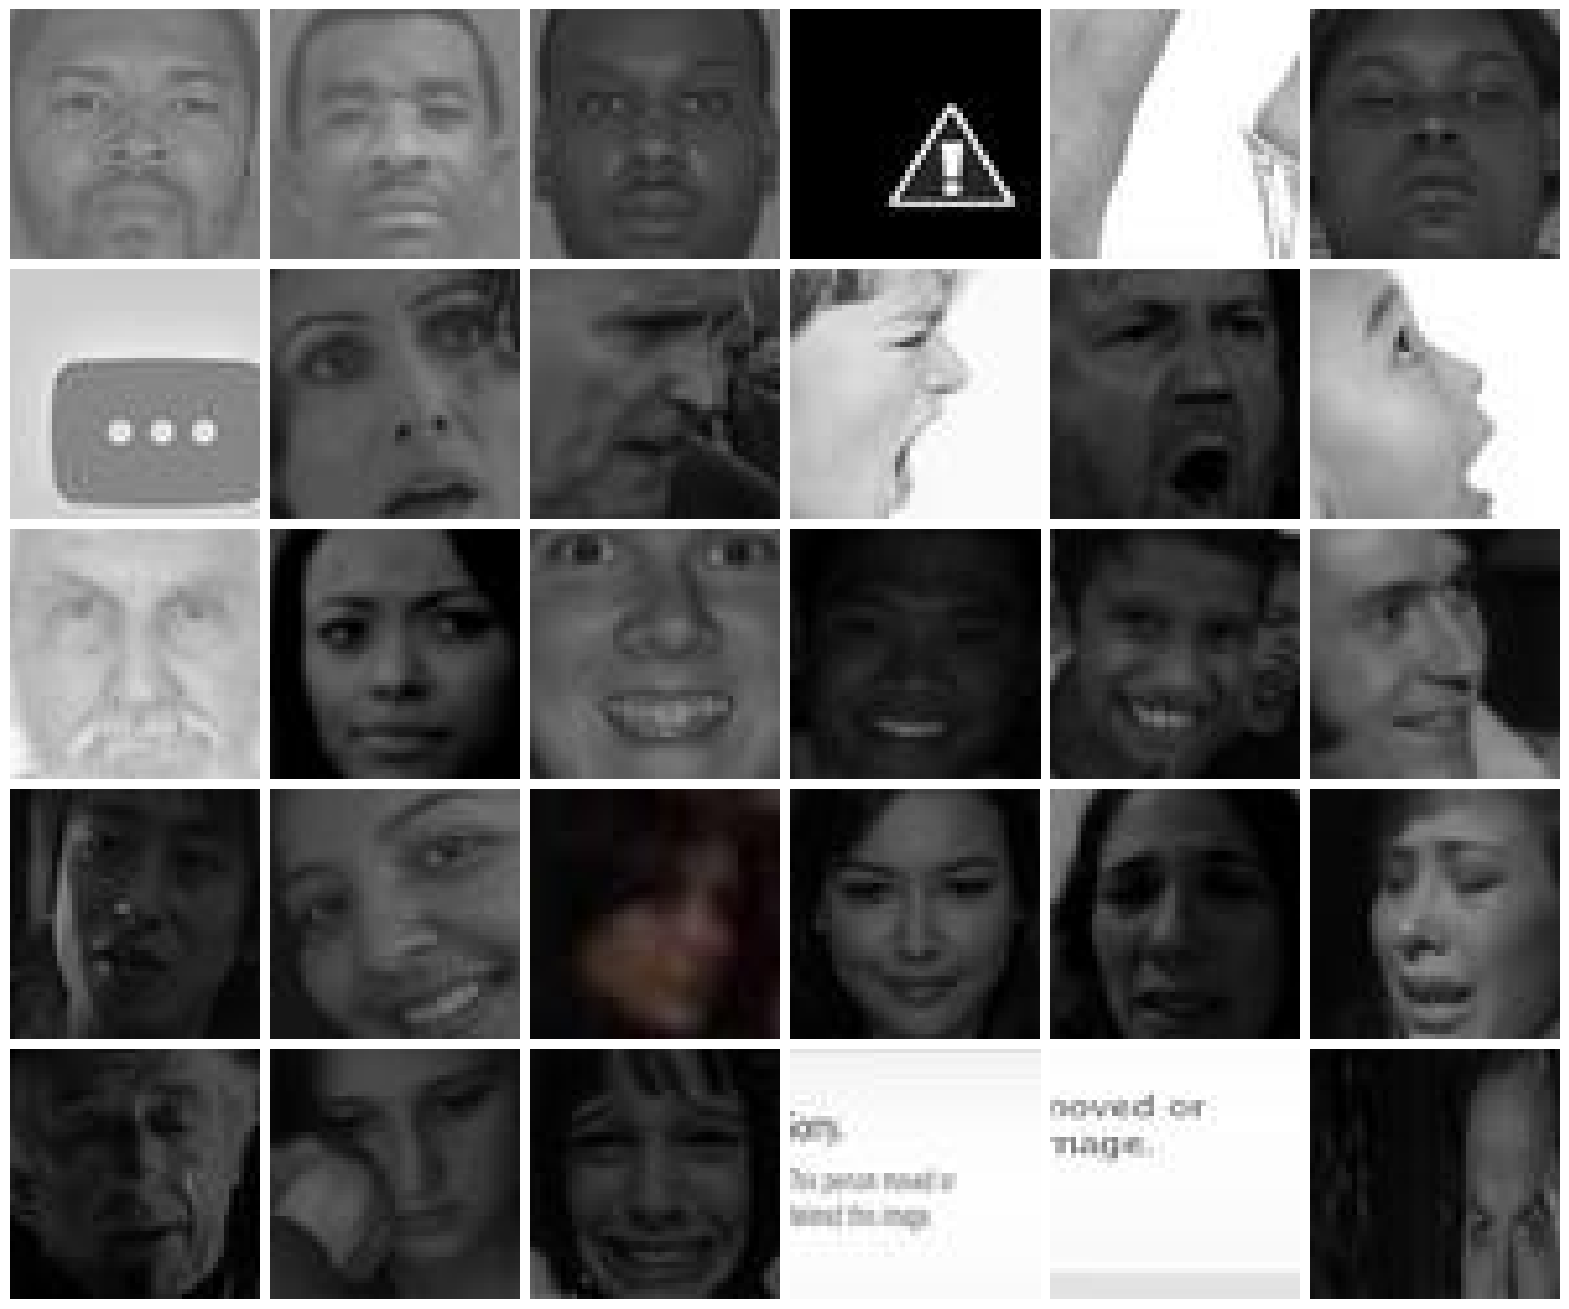


Images less than 675 bytes in valid:
Number of images: 25
Grid size: (5, 6)


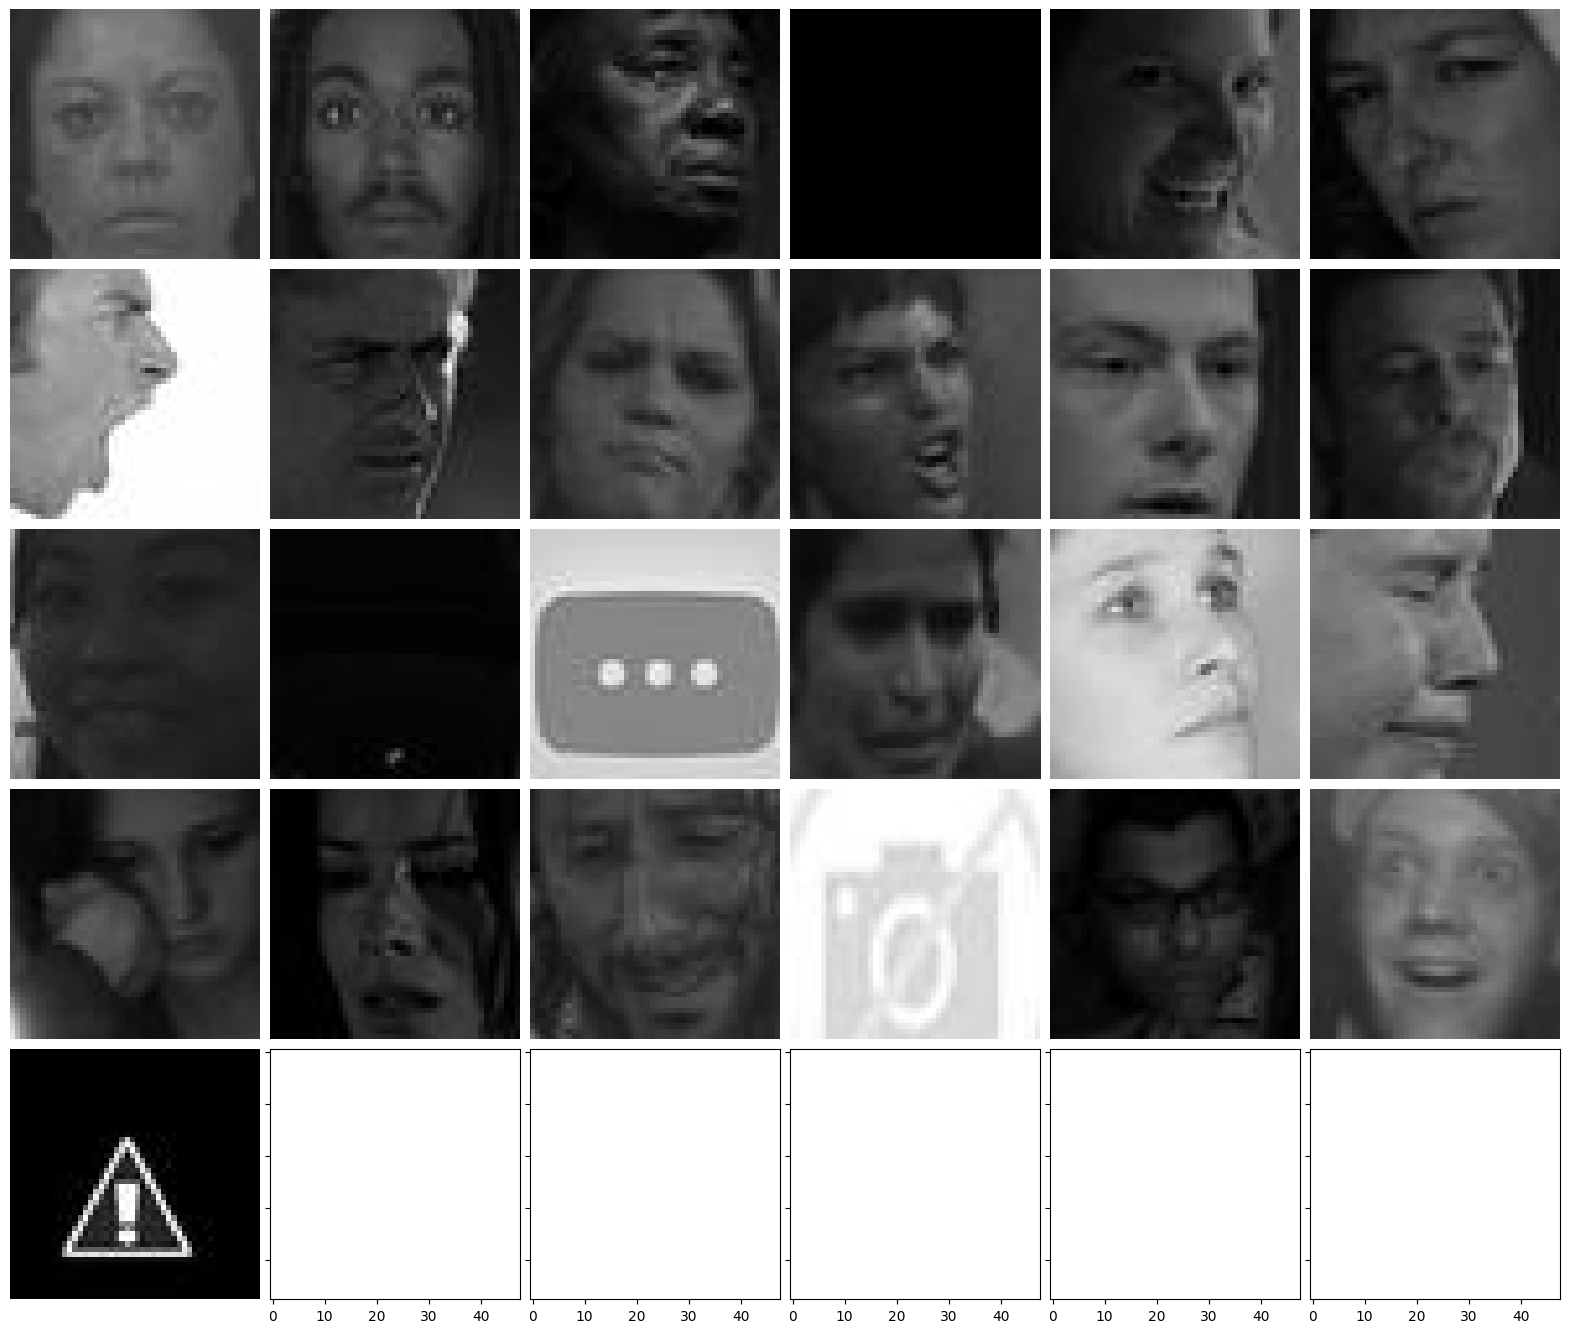

In [7]:
import os
FILE_SIZE_LOWER_LIMIT = 675

def summarize_images(folder,show_size_only=False):
    total_size = 0
    total_images = 0
    small_files = []
    emotion_counts = {}

    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.endswith(".jpg"):
                file_path = os.path.join(root, file)
                file_size = os.path.getsize(file_path)

                # Extract emotion from the path
                emotion = os.path.basename(os.path.dirname(file_path))

                total_size += file_size
                total_images += 1

                if file_size < FILE_SIZE_LOWER_LIMIT:
                    small_files.append(file_path)

                # Count per emotion
                if emotion in emotion_counts:
                    emotion_counts[emotion] += 1
                else:
                    emotion_counts[emotion] = 1

    average_size = total_size / total_images if total_images > 0 else 0

    print('###########################')
    print(f"Folder: {folder}")
    print(f"Total Images: {total_images}")
    print(f"Total Size: {total_size} bytes")
    print(f"Average Size: {average_size} bytes per file")
    print(f"Number of Files less than {FILE_SIZE_LOWER_LIMIT} bytes: {len(small_files)}")


    print("\nCount per emotion:")
    for emotion, count in emotion_counts.items():
        print(f"{emotion}: {count}")
    print('###########################')

    return {
                "total_size":total_size, 
                "total_images":total_images, 
                "small_files":small_files, 
                "emotion_counts":emotion_counts
            }

# Summarize images in the test folder
print("\nTest Folder:")
summary_test_dir = summarize_images(test_dir)

# Summarize images in the train folder
print("\nTrain Folder:")
summary_train_dir = summarize_images(train_dir)

# Summarize images in the valid folder
print("\nValid Folder:")
summary_valid_dir = summarize_images(valid_dir)

# Display small files in a grid
print(f'Images less than {FILE_SIZE_LOWER_LIMIT} bytes in train:')
display_images(summary_train_dir['small_files'])
print('')
print(f'Images less than {FILE_SIZE_LOWER_LIMIT} bytes in test:')
display_images(summary_test_dir['small_files'])
print('')
print(f'Images less than {FILE_SIZE_LOWER_LIMIT} bytes in valid:')
display_images(summary_valid_dir['small_files'])
print('')